# Trend and Anomaly Analyses of Long-term Tempro-Spatial Dataset

**Trend** and **anomaly** analyses are widely used in Earth Science research for detecting long term change.

An example is presented in this notebook of a numerical analysis of Sea Surface Temperature (SST) where the global change rate per decade has been calculated from 1982 to 2016. Moreover, its area-weighted global monthly SST anomaly time series is presented, too. In addition, all of calculating processes is list step by step.

* Data Source
> NOAA Optimum Interpolation (OI) Sea Surface Temperature (SST) V2 is downloaded from https://www.esrl.noaa.gov/psd/data/gridded/data.noaa.oisst.v2.html

## 1. Load basic libs

In [2]:
import importlib
import pandas as pd
import xarray as xr
import numpy as np
from numpy import nan
import sys
import warnings
import math
from glob import glob
import matplotlib.pyplot as plt

## 2. Read SST data

In [3]:
ds = xr.open_dataset('data/sst.mnmean.nc', drop_variables=['time_bnds'])
ds = ds.sel(time=slice('1982', '2016'))
ds

lons = ds.lon
lats = ds.lat
sst = ds.sst
nctime = ds.time

nt, nlat, nlon = sst.shape
ngrd = nlon*nlat

## 3. Trend Analysis

Here we present two ways of calculating linear trend. The first method is by using function `polyfit`...

### 3.1a Linear trend calculation 

In [11]:
sst_grd  = sst.values.reshape((nt, ngrd), order='F') 
x        = np.linspace(1,nt,nt)
sst_trend1 = np.empty((ngrd,1))
sst_trend1[:,:] = np.nan

for i in range(ngrd): 
    y = sst_grd[:,i]   
    if(not np.isnan(y[0])): 
        z = np.polyfit(x, y, 1) 
        sst_trend1[i,0] = z[0]*120.0

sst_trend1 = sst_trend1.reshape((nlat,nlon), order='F')
sst_trend1.shape

(89, 180)

### 3.1b Linear trend calculation - an alternative way

In [12]:
import scipy.stats as stats

sst_grd  = sst.values.reshape((nt, ngrd), order='F') 
x        = np.linspace(1,nt,nt)
sst_trend2 = np.empty((ngrd,1))
sst_trend2[:,:] = np.nan

for i in range(ngrd): 
    y = sst_grd[:,i]   
    if(not np.isnan(y[0])): 
        slope, intercept, r_value, p_value, std_err = stats.linregress(x, sst_grd[:,i])
        sst_trend2[i,0] = slope*120.0     
    
sst_trend2 = sst_trend2.reshape((nlat,nlon), order='F')
sst_trend2.shape

(89, 180)

### 3.2 Visualize SST trend

In [14]:
# clevs = np.linspace(-0.75, 0.75, 21)
# clevs

array([-0.75 , -0.675, -0.6  , -0.525, -0.45 , -0.375, -0.3  , -0.225,
       -0.15 , -0.075,  0.   ,  0.075,  0.15 ,  0.225,  0.3  ,  0.375,
        0.45 ,  0.525,  0.6  ,  0.675,  0.75 ])

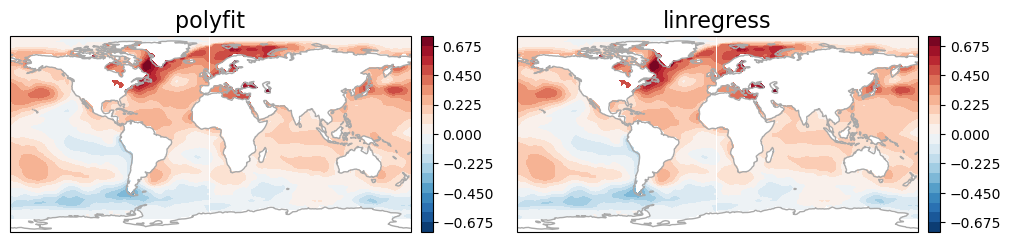

In [27]:
import matplotlib.pyplot as plt; import matplotlib
import cartopy.crs as ccrs
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
import datetime as dt

fig, axes = plt.subplots(ncols=2, 
                         subplot_kw={'projection': ccrs.PlateCarree()},
                         figsize=(12,9))
ax0, ax1 = axes

clevs = np.linspace(-0.75, 0.75, 21)
cs = ax0.contourf(lons, lats, sst_trend1, clevs, cmap=plt.cm.RdBu_r)
ax0.coastlines(color='darkgray', linewidth=1)
ax0.set_title('polyfit', fontsize=16)
cax = make_axes_locatable(ax0).append_axes("right", size="3%", pad=0.1, axes_class=plt.Axes)
cbar = plt.colorbar(cs, cax=cax, orientation='vertical') # cbar.ax.set_ylabel('$^oC$/decade', rotation=90)

cs = ax1.contourf(lons, lats, sst_trend2, clevs, cmap=plt.cm.RdBu_r)
ax1.coastlines(color='darkgray', linewidth=1)
ax1.set_title('linregress', fontsize=16)
cax = make_axes_locatable(ax1).append_axes("right", size="3%", pad=0.1, axes_class=plt.Axes)
cbar = plt.colorbar(cs, cax=cax, orientation='vertical')